# **application baseline**

## 라이브러리 및 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import pandas as pd
import os
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
path = '/content/drive/MyDrive/kaggle/home_credit_default_risk'

app_train = pd.read_csv(os.path.join(path, 'application_train.csv'))
app_test = pd.read_csv(os.path.join(path, 'application_test.csv'))


In [9]:
print(app_train.shape, app_test.shape)
app_train.head()

(307511, 122) (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

## 데이터 세트 기본 분석 

**TARGET 별 분포도**

In [12]:
app_train['TARGET'].value_counts() / app_train.shape[0] * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

**AMT_INCOME_TOTAL**

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <a list of 10 Patch objects>)

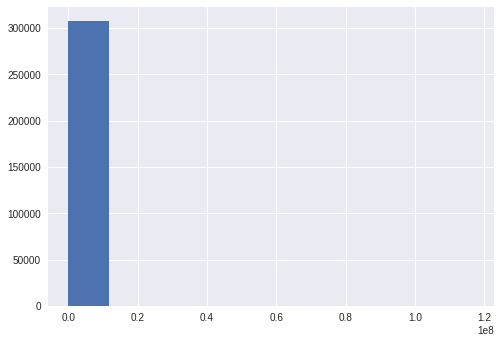

In [20]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

- AMT_INCOME_TOTAL 1000000 이하 분포도

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


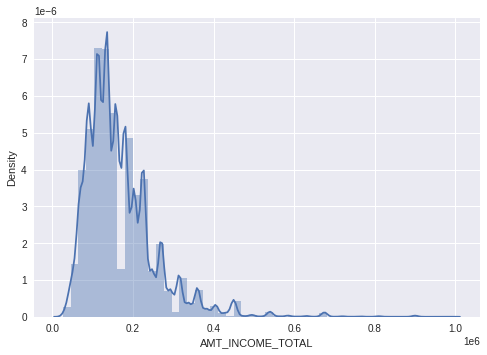

In [27]:
cond_1 = app_train['AMT_INCOME_TOTAL'] < 1000000
sns.distplot(app_train[cond_1]['AMT_INCOME_TOTAL'])

**TARGET 값 별 AMT_INCOME_TOTAL 분포도**

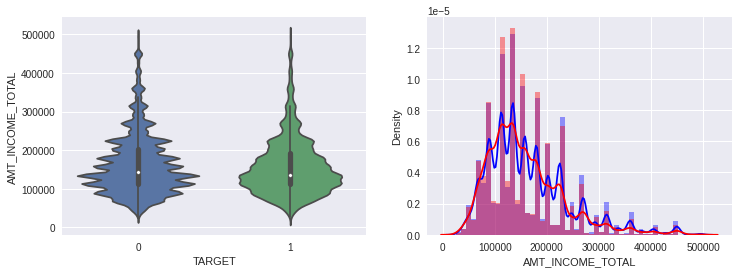

In [35]:
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)
cond_AMT = (app_train['AMT_INCOME_TOTAL'] < 500000)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(12,4), squeeze=False)
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_AMT], ax=axes[0][0])
sns.distplot(app_train[cond_0 & cond_AMT]['AMT_INCOME_TOTAL'], ax=axes[0][1], label='0', color='blue')
sns.distplot(app_train[cond_1 & cond_AMT]['AMT_INCOME_TOTAL'], ax=axes[0][1], label='1', color='red')

## 데이터 preprocessing

In [36]:
# app_train과 app_test 결합
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

**Object feaure Label Encoding**

In [42]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [43]:
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [49]:
# facotrize()
pd.factorize(apps['CODE_GENDER'])

(array([0, 1, 0, ..., 1, 0, 1]), Int64Index([0, 1, 2], dtype='int64'))

In [47]:
for column in object_columns:
  apps[column] = pd.factorize(apps[column])[0]

## NULL값 일괄 변환

In [51]:
apps.isnull().sum().head(10)

SK_ID_CURR                0
TARGET                48744
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              36
dtype: int64

In [52]:
# -999로 변환
apps = apps.fillna(-999)

## train, test 데이터 셋 분리

In [53]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == -999]

In [54]:
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [55]:
# app_test의 TARGET 칼럼 drop
app_test = app_test.drop('TARGET', axis=1)

In [56]:
app_test.shape

(48744, 121)

## train 데이터 학습, 검증 데이터로 분리

In [57]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [58]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=980216)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

## LGBM Classifier 학습

In [59]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
        eval_metric = 'auc', verbose=100, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.250717	training's auc: 0.752986	valid_1's binary_logloss: 0.250865	valid_1's auc: 0.74138
[200]	training's binary_logloss: 0.243883	training's auc: 0.772416	valid_1's binary_logloss: 0.246765	valid_1's auc: 0.752293
[300]	training's binary_logloss: 0.239638	training's auc: 0.785634	valid_1's binary_logloss: 0.245365	valid_1's auc: 0.756046
[400]	training's binary_logloss: 0.236152	training's auc: 0.797614	valid_1's binary_logloss: 0.24485	valid_1's auc: 0.757353
[500]	training's binary_logloss: 0.233215	training's auc: 0.807383	valid_1's binary_logloss: 0.244622	valid_1's auc: 0.757967
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.234059	training's auc: 0.804535	valid_1's binary_logloss: 0.244632	valid_1's auc: 0.757999


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

## Feature Importance 시각화

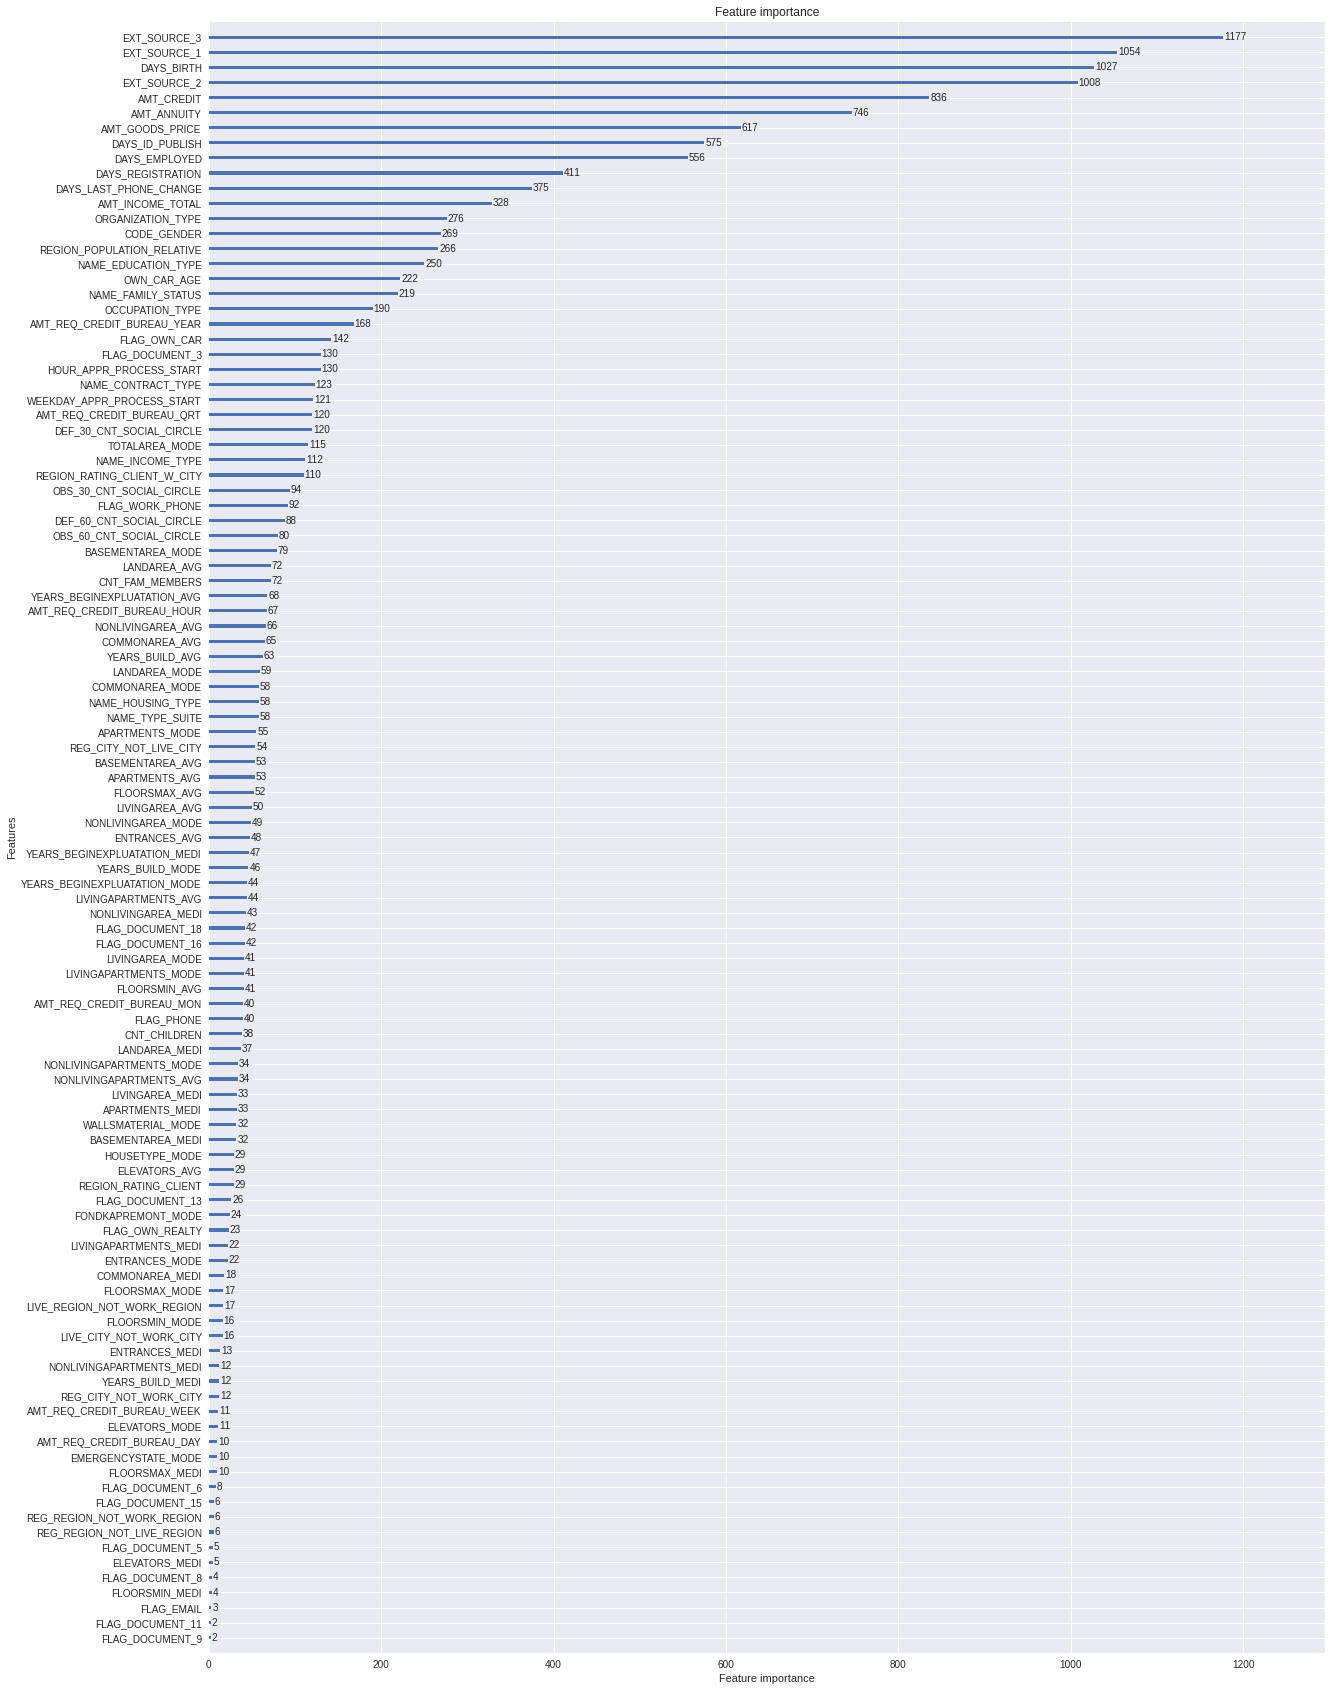

In [61]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(20,30))

## 테스트 데이터 예측

In [62]:
# train 셋이 'SK_ID_CURR'이 drop되어있으므로 test도 drop
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))

In [63]:
preds

array([[0.96483918, 0.03516082],
       [0.89808233, 0.10191767],
       [0.98307246, 0.01692754],
       ...,
       [0.96141388, 0.03858612],
       [0.92426619, 0.07573381],
       [0.81503809, 0.18496191]])

In [64]:
# kaggle 제출 양식은 1일때의 확률만 필요
preds = preds[:, 1]

In [65]:
app_test['TARGET'] = preds
app_test['TARGET'].head()

0    0.035161
1    0.101918
2    0.016928
3    0.034052
4    0.134446
Name: TARGET, dtype: float64

## csv 생성

In [66]:
app_test[['SK_ID_CURR','TARGET']].to_csv(os.path.join(path, 'application_baseline_1.csv'), index=False)

In [67]:
!ls '/content/drive/MyDrive/kaggle/home_credit_default_risk'

application_baseline_1.csv  credit_card_balance.csv
application_baseline.ipynb  HomeCredit_columns_description.csv
application_test.csv	    installments_payments.csv
application_train.csv	    POS_CASH_balance.csv
bureau_balance.csv	    previous_application.csv
bureau.csv		    sample_submission.csv
